# Import Necessary Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib





# Data Collection

In [18]:
# Load the dataset from a CSV file (adjust the file path)
dataset = pd.read_csv("housing_dataset.csv")

# Explore the dataset
print(dataset.head())  # Display the first few rows of the dataset


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

# Data Preprocessing

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

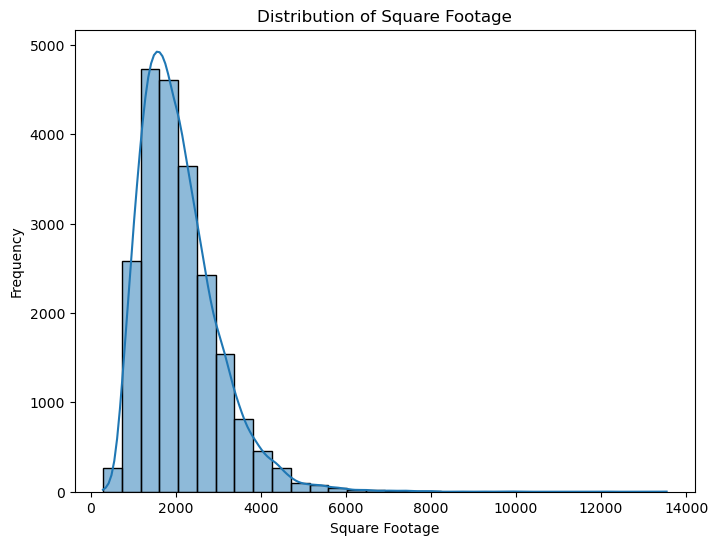

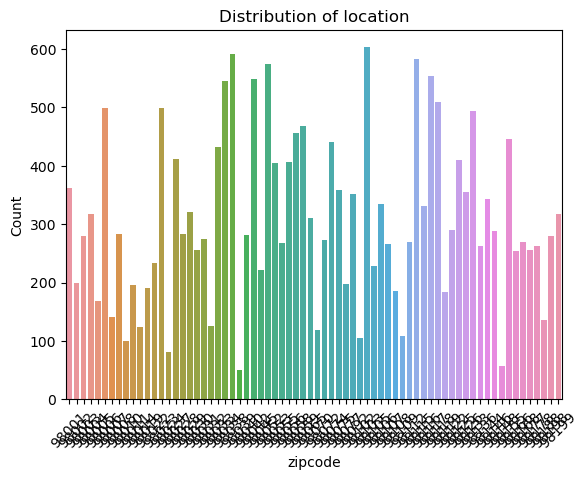

In [19]:
# Display basic statistics of numeric columns
print(dataset.describe())

# Visualize the distribution of a numeric feature (e.g., 'square_footage')
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='sqft_living', bins=30, kde=True)
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.title('Distribution of Square Footage')
plt.show()

# Explore categorical features (e.g., 'location')
sns.countplot(data=dataset, x='zipcode')
plt.xlabel('zipcode')
plt.ylabel('Count')
plt.title('Distribution of location')
plt.xticks(rotation=45)
plt.show()


# Featue Engineering

In [20]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv("housing_dataset.csv")

# Step 1: Feature Selection - Select relevant features
selected_features = ['sqft_living', 'bedrooms', 'bathrooms', 'zipcode', 'grade', 'sqft_above']

# Create a new DataFrame with only the selected features
data_selected = data[selected_features]

# Step 2: Feature Engineering - Create new features if needed
# For example, you can create a 'price_per_sqft' feature
data_selected['price_per_sqft'] = data['price'] / data['sqft_living']

# Display the first few rows of the modified DataFrame
print(data_selected.head())


   sqft_living  bedrooms  bathrooms  zipcode  grade  sqft_above  \
0         1180         3       1.00    98178      7        1180   
1         2570         3       2.25    98125      7        2170   
2          770         2       1.00    98028      6         770   
3         1960         4       3.00    98136      7        1050   
4         1680         3       2.00    98074      8        1680   

   price_per_sqft  
0      188.050847  
1      209.338521  
2      233.766234  
3      308.163265  
4      303.571429  


C:\Users\Admin\AppData\Local\Temp\ipykernel_14152\1484343177.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['price_per_sqft'] = data['price'] / data['sqft_living']


# Data Splitting

In [21]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv("housing_dataset.csv")

# Define the features (X) and the target variable (y)
X = data.drop(columns=['price'])  # Features (all columns except 'price')
y = data['price']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The 'test_size' parameter controls the ratio of the test set. Here, it's set to 0.2 (20% test, 80% training).

# You can print the sizes of the resulting sets to verify the split:
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))


Training set size: 17290
Test set size: 4323


# Model Selection

In [22]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv("housing_dataset.csv")

# Feature Engineering for Dates
data['date'] = pd.to_datetime(data['date'])  # Convert 'date' column to datetime objects
data['year'] = data['date'].dt.year  # Create a 'year' column
data['month'] = data['date'].dt.month  # Create a 'month' column
data['day'] = data['date'].dt.day  # Create a 'day' column

# Define the features (X) and the target variable (y)
X = data.drop(columns=['price', 'date'])  # Features (excluding 'price' and 'date')
y = data['price']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error: 44942079090.40845
Mean Absolute Error: 126912.3437260078
R-squared (R2) Score: 0.7027182400021396


# Model Training

In [23]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

# Model Evaluation

Mean Absolute Error (MAE): 126912.3437260078
Mean Squared Error (MSE): 44942079090.40845
Root Mean Squared Error (RMSE): 211995.46950444116
R-squared (R2) Score: 0.7027182400021396


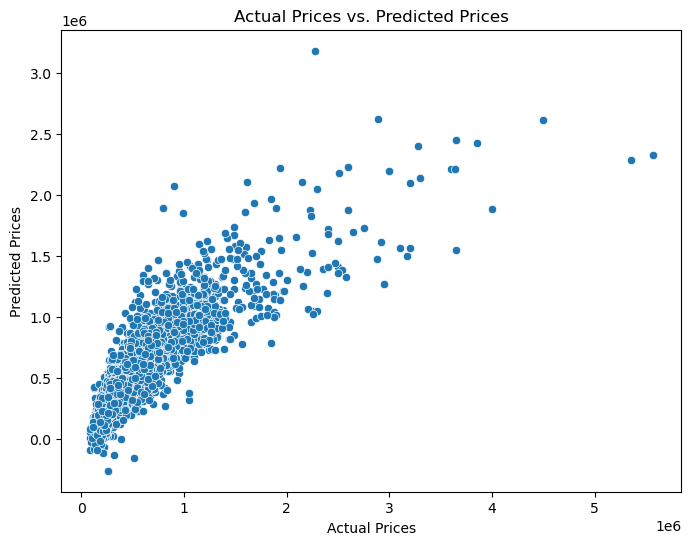

In [24]:

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)  # Calculate RMSE as the square root of MSE
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

# Visualize the model's predictions vs. actual prices with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


# Deployment

In [25]:
# Save the trained model to a file
joblib.dump(best_model, 'house_price_model.pkl')


['house_price_model.pkl']